In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.impute import SimpleImputer
import matplotlib as mpl

## **Import Dataset**

In [2]:
raw_data = pd.read_csv('highschool.csv', delimiter = ';')
raw_data

,student_id,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [3]:
raw_data.describe()

,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   student_id                    145 non-null    object
 1   age                           145 non-null    int64 
 2   sex                           145 non-null    int64 
 3   graduated_h_school_type       145 non-null    int64 
 4   scholarship_type              145 non-null    int64 
 5   additional_work               145 non-null    int64 
 6   activity                      145 non-null    int64 
 7   partner                       145 non-null    int64 
 8   total_salary                  145 non-null    int64 
 9   transport                     145 non-null    int64 
 10  accomodation                  145 non-null    int64 
 11  mother_ed                     145 non-null    int64 
 12  farther_ed                    145 non-null    int64 
 13  siblings            

In [5]:
print(raw_data.isnull().mean())

student_id                      0.0
age                             0.0
sex                             0.0
graduated_h_school_type         0.0
scholarship_type                0.0
additional_work                 0.0
activity                        0.0
partner                         0.0
total_salary                    0.0
transport                       0.0
accomodation                    0.0
mother_ed                       0.0
farther_ed                      0.0
siblings                        0.0
parental_status                 0.0
mother_occup                    0.0
father_occup                    0.0
weekly_study_hours              0.0
reading_non_scientific          0.0
reading_scientific              0.0
attendance_seminars_dep         0.0
impact_of_projects              0.0
attendances_classes             0.0
preparation_midterm_company     0.0
preparation_midterm_time        0.0
taking_notes                    0.0
listenning                      0.0
discussion_improves_interest

## **Memahami variabel**
Untuk semua variabel yang ada bisa kita kategorikan ke dalam beberapa golongan

> ##### 1. Data Pribadi
'student_id', 'age', 'sex', 'graduated_h_school_type',
'scholarship_type', 'additional_work', 'activity', 'partner',
'total_salary', 'transport','accomodation'
>
> ##### 2. Data Orang Tua
'mother_ed', 'farther_ed', 'siblings', 'parental_status', 'mother_occup', 'father_occup'
>
> ##### 3. Usaha dan Kebiasaan yang Dilakukan Siswa
'weekly_study_hours', 'reading_non_scientific', 'reading_scientific',
'attendance_seminars_dep', 'impact_of_projects', 'attendances_classes',
'preparation_midterm_company', 'preparation_midterm_time',
'taking_notes', 'listenning', 'discussion_improves_interest',
'flip_classrom', 'grade_previous', 'grade_expected', 'course_id',
'grade'

## **Drop Variabel yang tidak dibutuhkan**
Pada dataset ini, mari kita fokuskan kepada bagaimana usaha yang dilakukan mahasiswa itu sendiri, tidak menggantungkan peran dari keluarga terdekat, tak tergantung gender, status, dan asal sekolah sebelumnya. Maka dari itu dari variabel yang sudah digolongkan di antaranya akan didrop. variabel yang didrop adalah sebagai berikut:
>
dropcol = ['student_id', 'age', 'sex', 'graduated_h_school_type', 'partner', 'mother_ed', 'farther_ed', 'siblings', 'parental_status','mother_occup', 'father_occup']

In [6]:
dropcol = ['student_id', 'age', 'sex', 'graduated_h_school_type', 'partner', 'mother_ed', 
           'farther_ed', 'siblings', 'parental_status','mother_occup', 'father_occup']

data = raw_data.drop(columns=dropcol, axis=1)

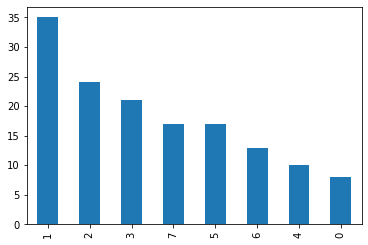

In [7]:
data.grade.value_counts()

#Plot Gambar
data.grade.value_counts().plot(kind='bar')
plt.show()

## **Klasifikasi Output Nilai Siswa**
Kali ini kita akan memprediksi apakah nilai siswa nanti baik atau buruknya. Dengan begitu kita akan mencoba membagi kategori nilai bagus dan tidaknya.
grade - OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

Dapat dilihat bahwa ada kategori nilai yang bisa dibilang ambigu apakah nilainya bagus atau tidak, khususnya pada 3 (CC) dan 4 (CB).
Dengan begitu pembagian kategori yang saya lakukan adalah sebagai berikut
- good = ['4','5', '6', '7']
- bad = ['0','1','2','3']

In [8]:
#define values
great = ['4','5','6','7']

#create new column to classify ending
data['grade_ending'] = np.where(data['grade'].isin(great), 'good', 'bad')

In [9]:
dropping = ['grade']
new_data = data.drop(columns=dropping,axis=1)

<AxesSubplot:title={'center':'good vs bad grade'}>

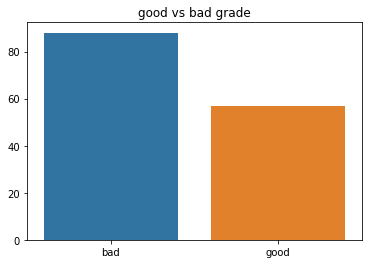

In [10]:
# check the balance
plt.title('good vs bad grade')
sns.barplot(x=new_data.grade_ending.value_counts().index,
            y=new_data.grade_ending.value_counts().values)

In [11]:
new_data

,scholarship_type,additional_work,activity,total_salary,transport,accomodation,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade_ending
0,3,1,2,1,1,1,3,2,2,1,...,1,1,3,2,1,2,1,1,1,bad
1,3,1,2,1,1,1,2,2,2,1,...,1,1,3,2,3,2,2,3,1,bad
2,3,2,2,2,4,2,2,1,2,1,...,1,1,2,2,1,1,2,2,1,bad
3,3,1,2,2,1,2,3,1,2,1,...,1,2,3,2,2,1,3,2,1,bad
4,3,2,2,3,1,4,2,1,1,1,...,2,1,2,2,2,1,2,2,1,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3,1,1,1,1,2,3,3,2,1,...,1,1,2,1,2,1,3,3,9,good
141,4,2,2,1,4,2,3,2,2,2,...,1,1,3,2,2,1,5,3,9,good
142,4,2,2,1,1,1,2,2,2,1,...,1,1,3,3,2,1,4,3,9,bad
143,4,1,1,5,2,3,2,2,1,1,...,2,1,2,1,2,1,5,3,9,good


In [12]:
new_data.columns

Index(['scholarship_type', 'additional_work', 'activity', 'total_salary',
       'transport', 'accomodation', 'weekly_study_hours',
       'reading_non_scientific', 'reading_scientific',
       'attendance_seminars_dep', 'impact_of_projects', 'attendances_classes',
       'preparation_midterm_company', 'preparation_midterm_time',
       'taking_notes', 'listenning', 'discussion_improves_interest',
       'flip_classrom', 'grade_previous', 'grade_expected', 'course_id',
       'grade_ending'],
      dtype='object')

In [13]:
# mengganti nilai "good" dengan 1 dan "bad" dengan 0
new_data['grade_ending'] = new_data['grade_ending'].map({'good': 1, 'bad': 0})

# menampilkan hasil konversi
new_data

,scholarship_type,additional_work,activity,total_salary,transport,accomodation,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade_ending
0,3,1,2,1,1,1,3,2,2,1,...,1,1,3,2,1,2,1,1,1,0
1,3,1,2,1,1,1,2,2,2,1,...,1,1,3,2,3,2,2,3,1,0
2,3,2,2,2,4,2,2,1,2,1,...,1,1,2,2,1,1,2,2,1,0
3,3,1,2,2,1,2,3,1,2,1,...,1,2,3,2,2,1,3,2,1,0
4,3,2,2,3,1,4,2,1,1,1,...,2,1,2,2,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3,1,1,1,1,2,3,3,2,1,...,1,1,2,1,2,1,3,3,9,1
141,4,2,2,1,4,2,3,2,2,2,...,1,1,3,2,2,1,5,3,9,1
142,4,2,2,1,1,1,2,2,2,1,...,1,1,3,3,2,1,4,3,9,0
143,4,1,1,5,2,3,2,2,1,1,...,2,1,2,1,2,1,5,3,9,1


## **Correlation Variables**

- ### Heatmap Correlation

<AxesSubplot:>

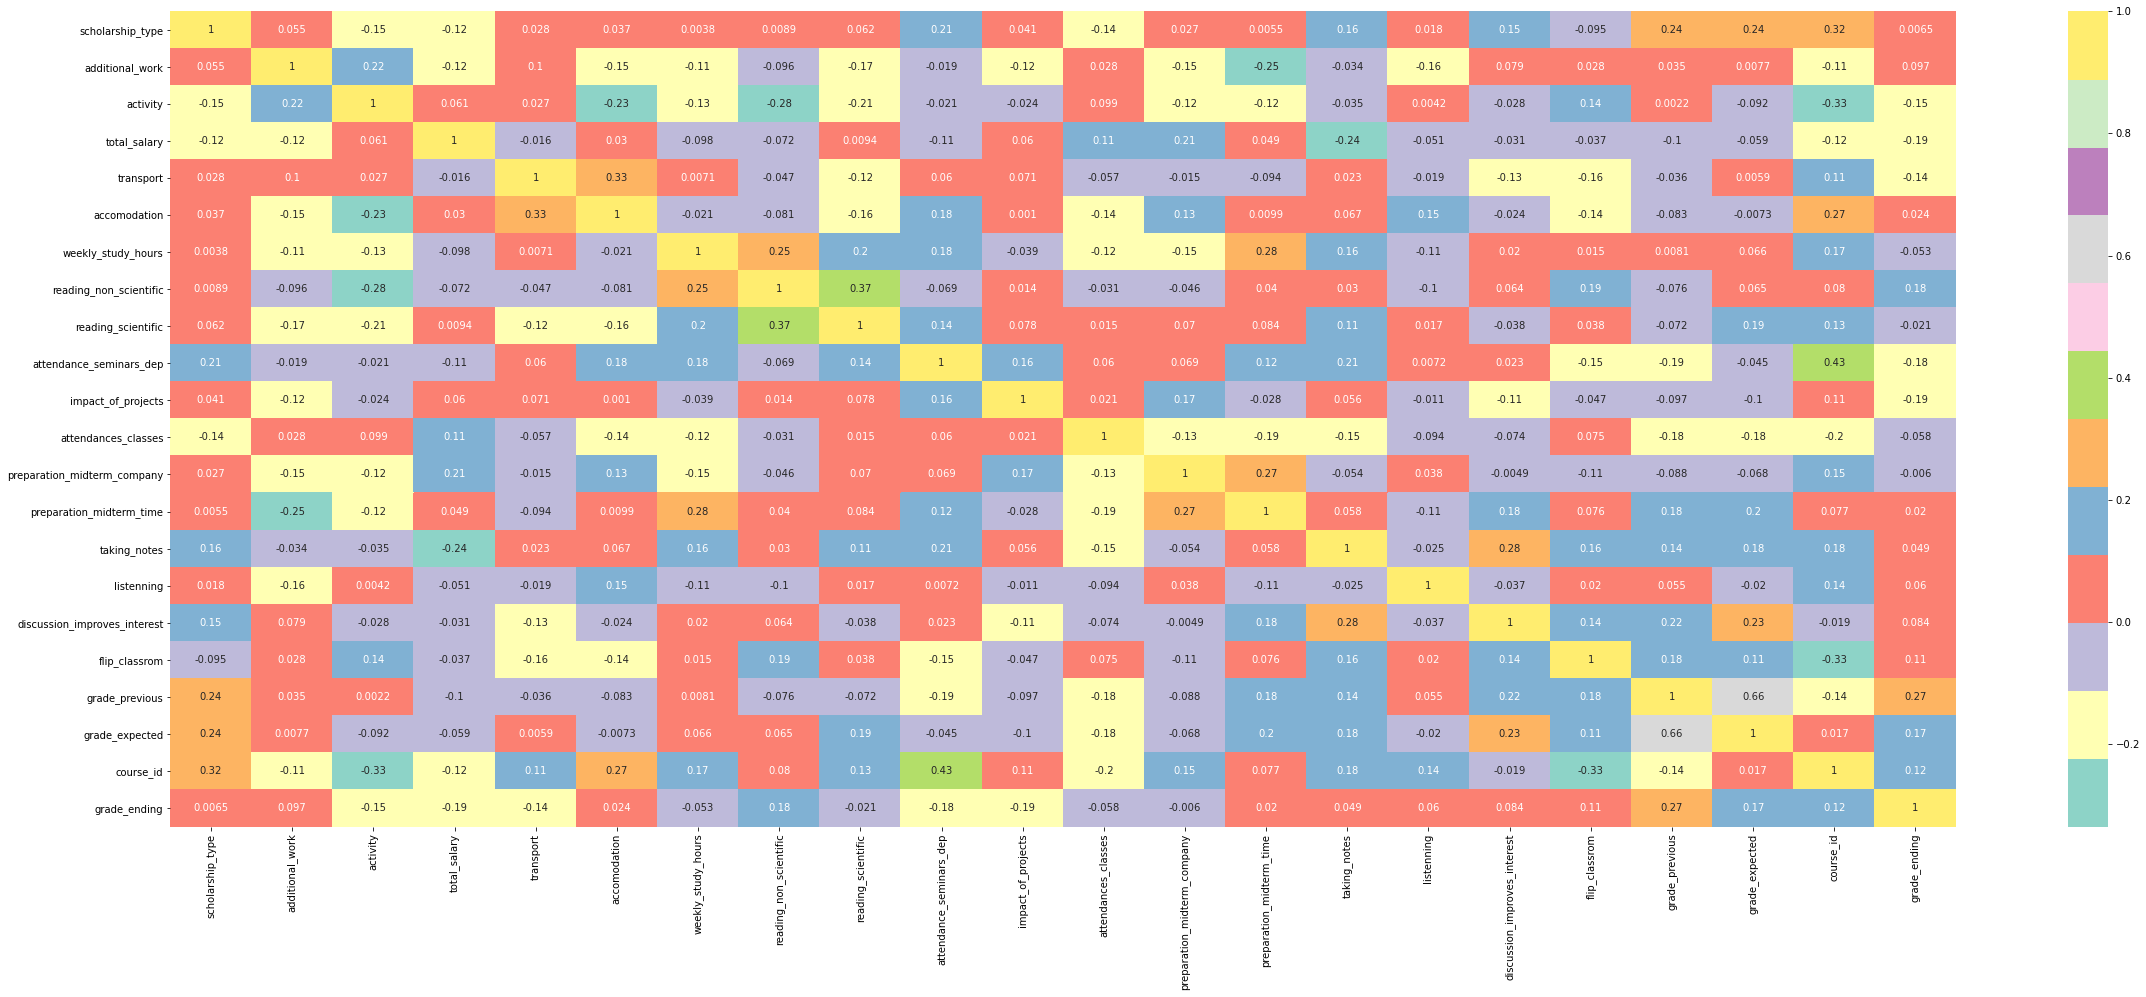

In [14]:
plt.figure(figsize=(40,15))
sns.heatmap(new_data.corr(), annot=True, cmap='Set3')

- ### Pivot Table

In [15]:
# numerical
num_data = new_data.drop(columns=['grade_ending'])

In [16]:
num_data.columns

Index(['scholarship_type', 'additional_work', 'activity', 'total_salary',
       'transport', 'accomodation', 'weekly_study_hours',
       'reading_non_scientific', 'reading_scientific',
       'attendance_seminars_dep', 'impact_of_projects', 'attendances_classes',
       'preparation_midterm_company', 'preparation_midterm_time',
       'taking_notes', 'listenning', 'discussion_improves_interest',
       'flip_classrom', 'grade_previous', 'grade_expected', 'course_id'],
      dtype='object')

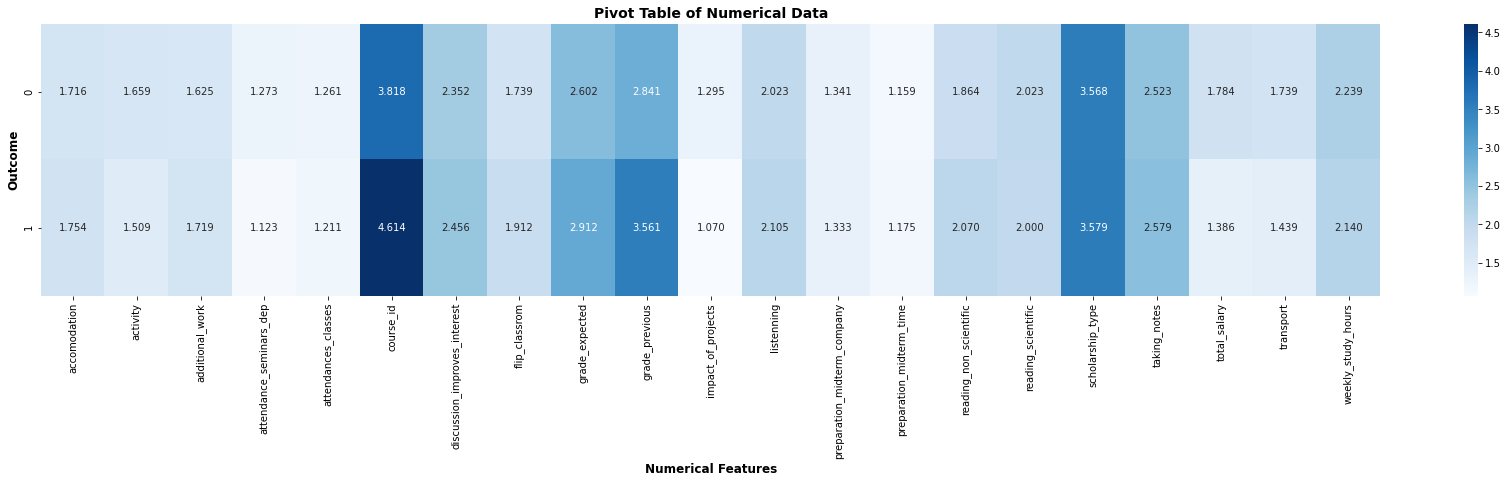

In [17]:
# pivot table
pivot_table = pd.pivot_table(new_data, index = 'grade_ending', values = num_data.columns)

# plot heatmap
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='Blues', ax=ax)
ax.set_title('Pivot Table of Numerical Data', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Numerical Features', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Outcome', fontsize=12, fontweight = 'bold')

plt.show()

- ### Histogram (Distribution)

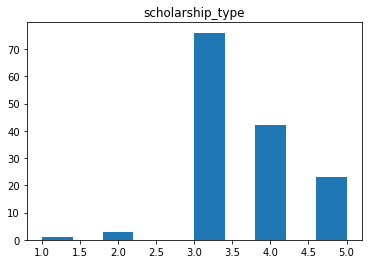

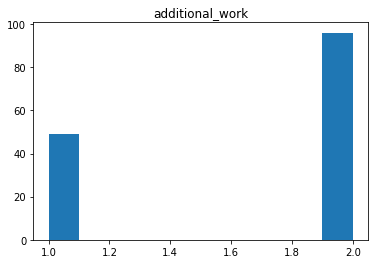

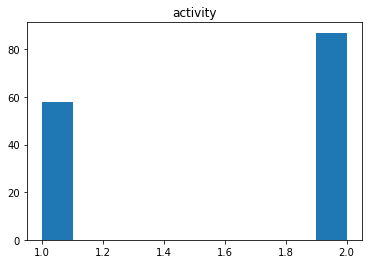

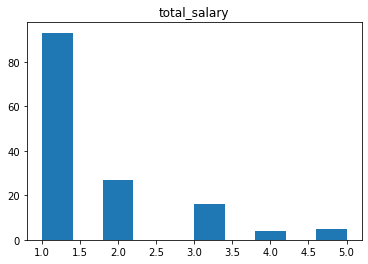

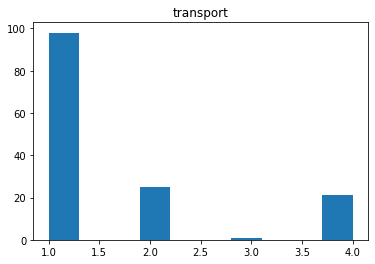

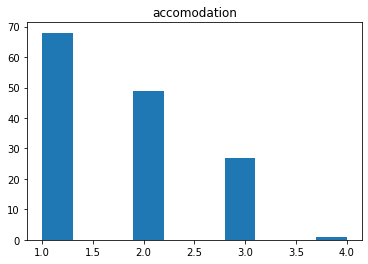

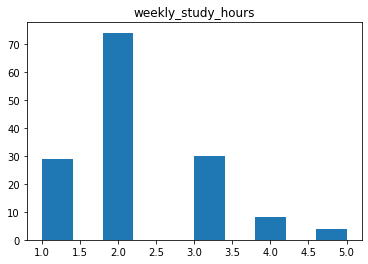

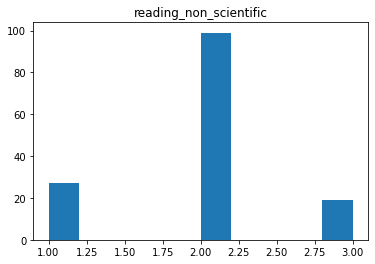

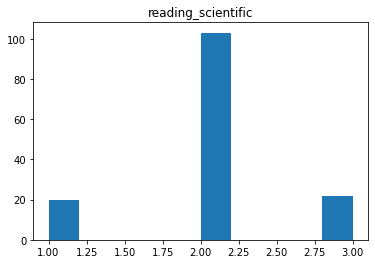

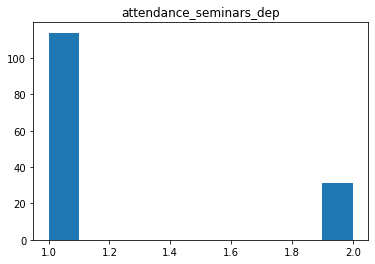

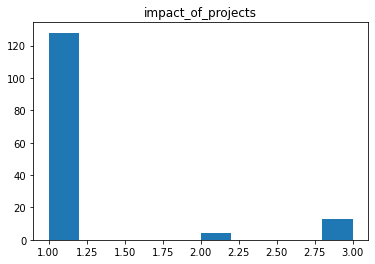

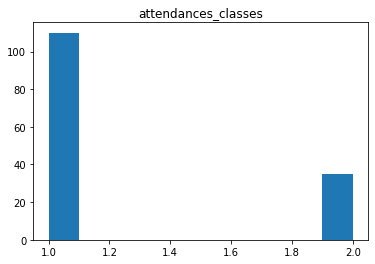

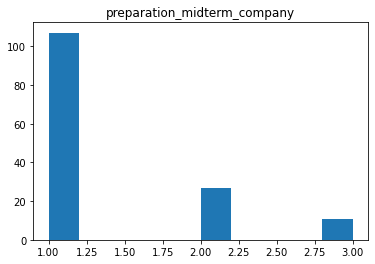

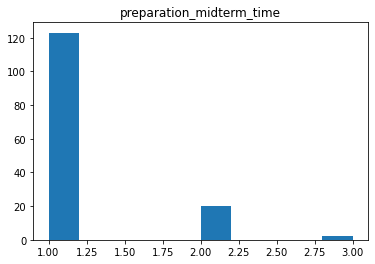

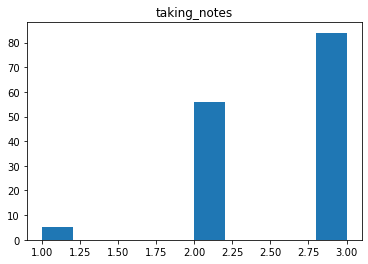

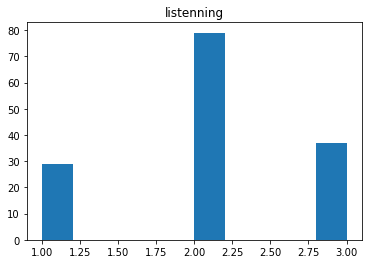

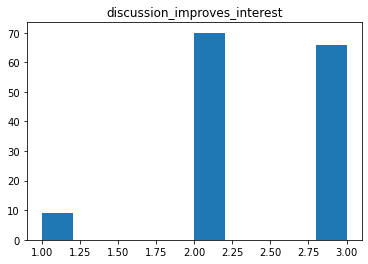

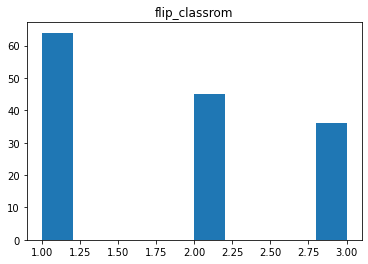

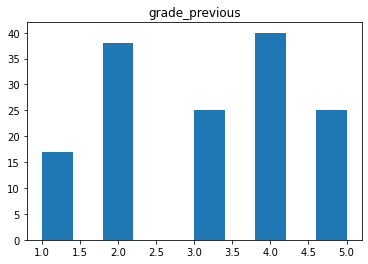

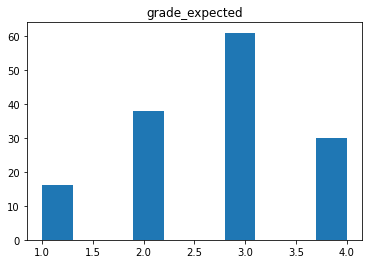

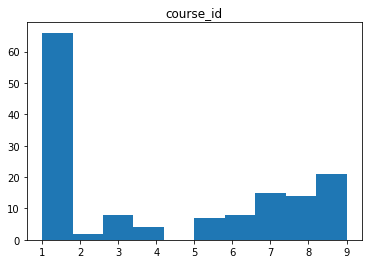

In [18]:
# 1. distribution
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

In [19]:
dropped_col = ['flip_classrom','grade_previous','grade_expected']
df = new_data.drop(columns=dropped_col,axis=1)

## **Final Data**

In [20]:
df

,scholarship_type,additional_work,activity,total_salary,transport,accomodation,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,course_id,grade_ending
0,3,1,2,1,1,1,3,2,2,1,1,1,1,1,3,2,1,1,0
1,3,1,2,1,1,1,2,2,2,1,1,1,1,1,3,2,3,1,0
2,3,2,2,2,4,2,2,1,2,1,1,1,1,1,2,2,1,1,0
3,3,1,2,2,1,2,3,1,2,1,1,1,1,2,3,2,2,1,0
4,3,2,2,3,1,4,2,1,1,1,1,1,2,1,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3,1,1,1,1,2,3,3,2,1,1,1,1,1,2,1,2,9,1
141,4,2,2,1,4,2,3,2,2,2,1,2,1,1,3,2,2,9,1
142,4,2,2,1,1,1,2,2,2,1,1,1,1,1,3,3,2,9,0
143,4,1,1,5,2,3,2,2,1,1,1,1,2,1,2,1,2,9,1


In [21]:
df.columns.values

array(['scholarship_type', 'additional_work', 'activity', 'total_salary',
       'transport', 'accomodation', 'weekly_study_hours',
       'reading_non_scientific', 'reading_scientific',
       'attendance_seminars_dep', 'impact_of_projects',
       'attendances_classes', 'preparation_midterm_company',
       'preparation_midterm_time', 'taking_notes', 'listenning',
       'discussion_improves_interest', 'course_id', 'grade_ending'],
      dtype=object)

## **Outlier**

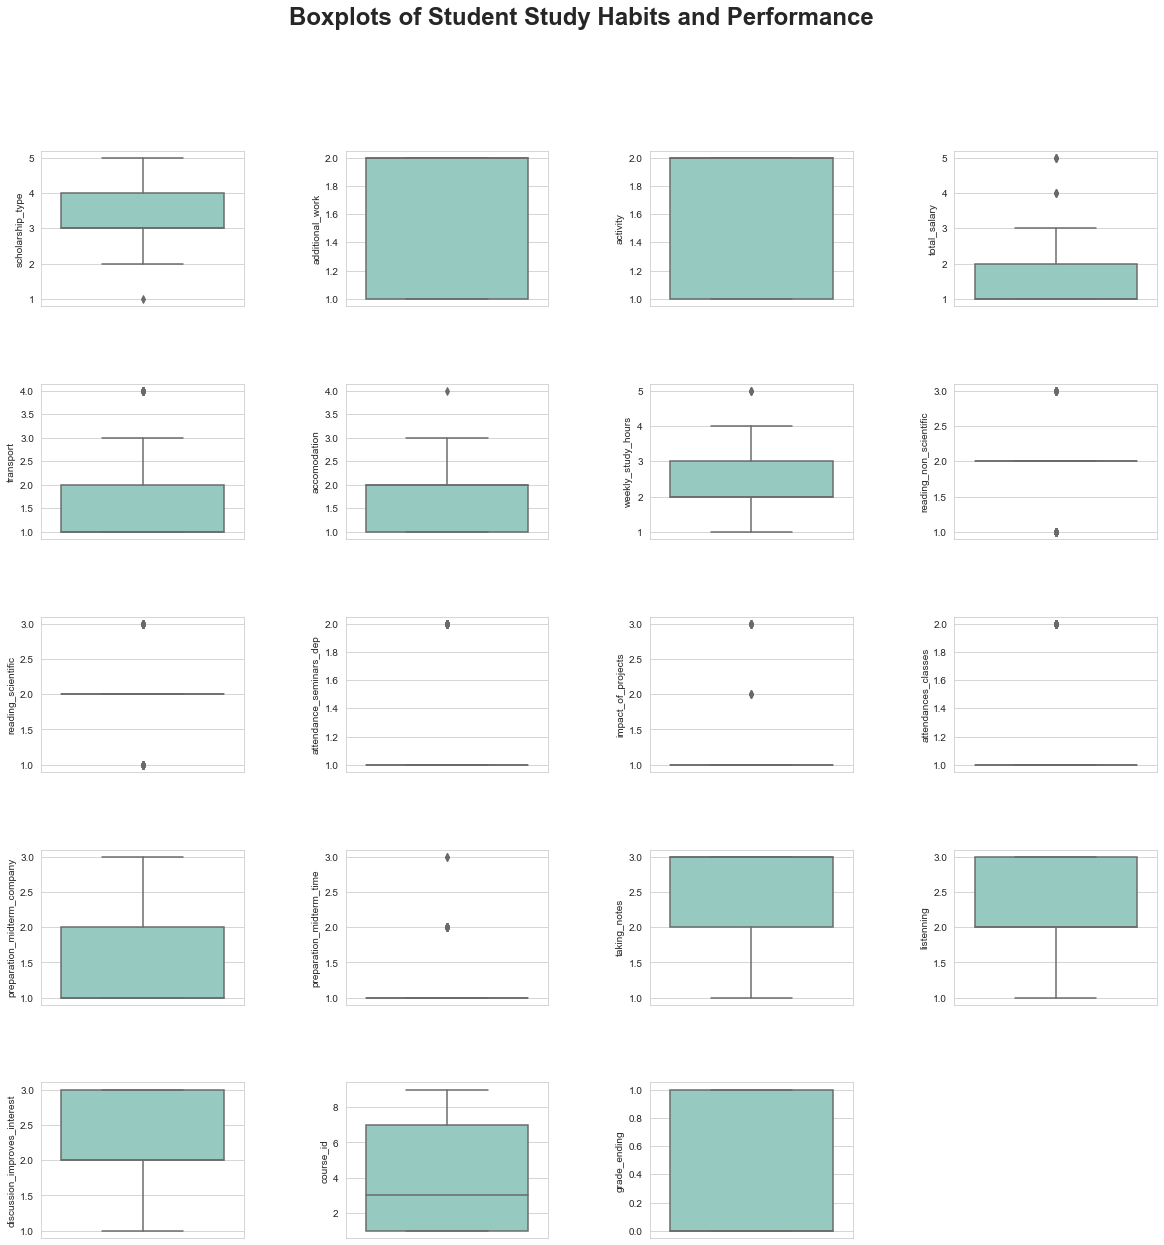

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# create boxplots for each variable
sns.boxplot(y=df["scholarship_type"], ax=axes[0,0], palette="Set3")
sns.boxplot(y=df["additional_work"], ax=axes[0,1], palette="Set3")
sns.boxplot(y=df["activity"], ax=axes[0,2], palette="Set3")
sns.boxplot(y=df["total_salary"], ax=axes[0,3], palette="Set3")
sns.boxplot(y=df["transport"], ax=axes[1,0], palette="Set3")
sns.boxplot(y=df["accomodation"], ax=axes[1,1], palette="Set3")
sns.boxplot(y=df["weekly_study_hours"], ax=axes[1,2], palette="Set3")
sns.boxplot(y=df["reading_non_scientific"], ax=axes[1,3], palette="Set3")
sns.boxplot(y=df["reading_scientific"], ax=axes[2,0], palette="Set3")
sns.boxplot(y=df["attendance_seminars_dep"], ax=axes[2,1], palette="Set3")
sns.boxplot(y=df["impact_of_projects"], ax=axes[2,2], palette="Set3")
sns.boxplot(y=df["attendances_classes"], ax=axes[2,3], palette="Set3")
sns.boxplot(y=df["preparation_midterm_company"], ax=axes[3,0], palette="Set3")
sns.boxplot(y=df["preparation_midterm_time"], ax=axes[3,1], palette="Set3")
sns.boxplot(y=df["taking_notes"], ax=axes[3,2], palette="Set3")
sns.boxplot(y=df["listenning"], ax=axes[3,3], palette="Set3")
sns.boxplot(y=df["discussion_improves_interest"], ax=axes[4,0], palette="Set3")
sns.boxplot(y=df["course_id"], ax=axes[4,1], palette="Set3")
sns.boxplot(y=df["grade_ending"], ax=axes[4,2], palette="Set3")

# remove empty subplot
fig.delaxes(axes[4,3])

# adjust subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# set axis labels and title
axes[0,0].set_ylabel("scholarship_type")
axes[0,1].set_ylabel("additional_work")
axes[0,2].set_ylabel("activity")
axes[0,3].set_ylabel("total_salary")
axes[1,0].set_ylabel("transport")
axes[1,1].set_ylabel("accomodation")
axes[1,2].set_ylabel("weekly_study_hours")
axes[1,3].set_ylabel("reading_non_scientific")
axes[2,0].set_ylabel("reading_scientific")
axes[2,1].set_ylabel("attendance_seminars_dep")
axes[2,2].set_ylabel("impact_of_projects")
axes[2,3].set_ylabel("attendances_classes")
axes[3,0].set_ylabel("preparation_midterm_company")
axes[3,1].set_ylabel("preparation_midterm_time")
axes[3,2].set_ylabel("taking_notes")
axes[3,3].set_ylabel("listenning")
axes[4,0].set_ylabel("discussion_improves_interest")
axes[4,1].set_ylabel("course_id")
axes[4,2].set_ylabel("grade_ending")
fig.suptitle("Boxplots of Student Study Habits and Performance", fontsize=24, fontweight='bold')

# show the plot
plt.show()

In [23]:
from scipy import stats

# specify columns to be transformed
cols_to_transform = ["scholarship_type", "total_salary", "transport", "accomodation", "weekly_study_hours", 
                     "reading_non_scientific", "reading_scientific", "attendance_seminars_dep", "impact_of_projects", 
                     "attendances_classes", "preparation_midterm_time"]

# apply power transform using Box-Cox method
for col in cols_to_transform:
    df[col] = stats.boxcox(df[col] + 1)[0]  # add 1 to avoid negative values



### **Split Data**

In [24]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
array = df.values
X = array[:,0:18]
Y = array[:,18]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

## **Model Prediksi**
Model prediksi yang digunakan yaitu:

- **Logistic Regression (LR)**: model yang digunakan untuk memprediksi variabel target dengan menggunakan kombinasi linier dari fitur masukan.
- **Linear Discriminant Analysis (LDA)**: model yang digunakan untuk mencari garis pemisah antar kelas yang optimal berdasarkan perbedaan mean - antara kelas dan kovarians antar kelas.
- **K-Nearest Neighbors (KNN)**: model yang digunakan untuk melakukan klasifikasi berdasarkan kedekatan dengan tetangga terdekat (k-NN) dari setiap sampel di ruang fitur.
- **Decision Tree Classifier (CART)**: model yang digunakan untuk melakukan klasifikasi dengan membuat pohon keputusan, yaitu model yang memisahkan data berdasarkan serangkaian aturan berhierarki.
- **Gaussian Naive Bayes (NB)**: model yang digunakan untuk memprediksi variabel target dengan menghitung probabilitas setiap fitur terhadap setiap kelas dan menggunakan teorema Bayes.
- **Random Forest Classifier (RF)**: model yang digunakan untuk memprediksi variabel target dengan membuat sejumlah besar pohon keputusan dan mengambil keputusan berdasarkan mayoritas suara dari pohon-pohon tersebut.
- **Multi-Layer Perceptron (MLP)**: model yang digunakan untuk memprediksi variabel target dengan menggunakan jaringan saraf tiruan yang terdiri dari lapisan input, lapisan tersembunyi, dan lapisan output.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

LR: 0.593939 (0.098613)
LDA: 0.584848 (0.089689)
KNN: 0.612879 (0.163519)
CART: 0.751515 (0.140583)
NB: 0.639394 (0.114902)
RF: 0.742424 (0.105952)


c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optim

MLP: 0.560606 (0.068013)


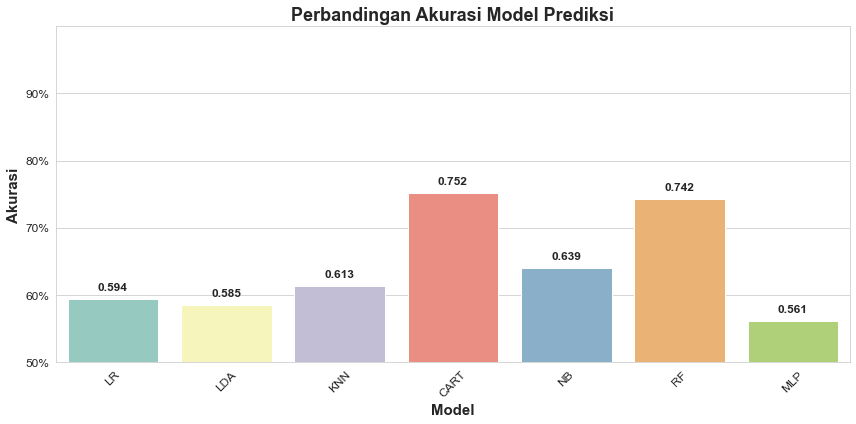

In [27]:
# Define the models to test
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('RF', RandomForestClassifier()),
    ('MLP', MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=seed))
]

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig, ax = plt.subplots(figsize=(12, 6))

mean_results = [np.mean(x) for x in results]

sns.barplot(x=names, y=mean_results, palette='Set3')

ax.set_xticklabels(names, fontsize=12, rotation=45)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_yticklabels(['40%', '50%', '60%', '70%', '80%', '90%'], fontsize=12)
ax.set_xlabel('Model', fontsize=15, fontweight='bold')
ax.set_ylabel('Akurasi', fontsize=15, fontweight='bold')
ax.set_title('Perbandingan Akurasi Model Prediksi', fontsize=18, fontweight='bold')

for i in range(len(names)):
    plt.text(i, mean_results[i]+0.01, '{:.3f}'.format(mean_results[i]), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()

In [28]:
# print the best model
best_model_idx = np.argmax([x.mean() for x in results])
print('Best model: {}'.format(names[best_model_idx]))
print('Accuracy: {}'.format(results[best_model_idx].mean()))

Best model: CART
Accuracy: 0.7515151515151516
